In [ ]:
## Problem statement: To understand the buying trend and the consumer behavior of online purchase.

In [83]:
## Importing data handling libraries
import pandas as pd 
import numpy as np
from collections import OrderedDict

## Importing encoding libraries
from sklearn.preprocessing import LabelEncoder

## Importing data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Importing statistical libraries
import scipy.stats as scipy_stats

## Import warnings
import warnings
warnings.filterwarnings('ignore')

## Import feature scaling libraries
from sklearn.preprocessing import StandardScaler

## Splitting train and test data
from sklearn.model_selection import train_test_split

## Model building algoriths
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgboost
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

## Library for error calculation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Library for Kmeans
from sklearn.cluster import KMeans

## Model Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Learning Curve
from sklearn.model_selection import learning_curve

In [5]:
## Importing the dataset
redmi = pd.read_excel("Xiaomi new.xlsx")
redmi.head()

,TXNID,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [6]:
## getting rid of the unwanted columns
redmi=redmi.drop('TXNID',axis=1)
redmi.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Monday,Chrome,13,4,8.5,2668.0
1,Saturday,Chrome,15,5,16.9,3469.0
2,Monday,Internet Explorer,20,6,7.3,5215.0
3,Monday,Chrome,42,6,30.1,10423.0
4,Saturday,Internet Explorer,20,6,13.3,5404.0


In [7]:
## Performing the basic EDA
redmi.describe()

,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000
mean,23.740000,4.820000,12.810000,6812.820000
std,8.267647,2.016853,6.002444,3201.905731
min,8.000000,2.000000,4.300000,1784.000000
25%,18.000000,3.000000,8.500000,4473.000000
50%,22.500000,4.500000,11.400000,6215.000000
75%,29.000000,6.000000,15.100000,8412.000000
max,46.000000,10.000000,32.900000,15851.000000


In [8]:
## Performing Label Encoding
le = LabelEncoder()
le.fit(redmi['Day'])
redmi['Day']=le.transform(redmi['Day'])
redmi.head()

le.fit(redmi['Browser'])
redmi['Browser']=le.transform(redmi['Browser'])
redmi.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,0,13,4,8.5,2668.0
1,2,0,15,5,16.9,3469.0
2,1,2,20,6,7.3,5215.0
3,1,0,42,6,30.1,10423.0
4,2,2,20,6,13.3,5404.0


In [9]:
## To check the dtype
redmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 6 columns):
Day                   43200 non-null int32
Browser               43200 non-null int32
No. of Clicks         43200 non-null int64
Pages Viewed          43200 non-null int64
Time (min)            43200 non-null float64
Amount Spent (Rs.)    43200 non-null float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 1.6 MB


In [10]:
## To check the null values
redmi.isnull().sum()

Day                   0
Browser               0
No. of Clicks         0
Pages Viewed          0
Time (min)            0
Amount Spent (Rs.)    0
dtype: int64

In [11]:
## Outlier Treatment
redmi.describe()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.0000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,2.5800,0.600000,23.740000,4.820000,12.810000,6812.820000
std,2.0985,0.721119,8.267647,2.016853,6.002444,3201.905731
min,0.0000,0.000000,8.000000,2.000000,4.300000,1784.000000
25%,1.0000,0.000000,18.000000,3.000000,8.500000,4473.000000
50%,2.0000,0.000000,22.500000,4.500000,11.400000,6215.000000
75%,5.0000,1.000000,29.000000,6.000000,15.100000,8412.000000
max,6.0000,2.000000,46.000000,10.000000,32.900000,15851.000000


In [12]:
## Performing feature scaling
x = StandardScaler().fit_transform(redmi)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5
0,-0.752927,-0.832050,-1.299055,-0.406579,-0.718049,-1.294500
1,-0.276391,-0.832050,-1.057145,0.089249,0.681397,-1.044334
2,-0.752927,1.941451,-0.452371,0.585077,-0.917970,-0.499027
3,-0.752927,-0.832050,2.208635,0.585077,2.880527,1.127523
4,-0.276391,1.941451,-0.452371,0.585077,0.081634,-0.439999


In [13]:
x.describe()

,0,1,2,3,4,5
count,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04,4.320000e+04
mean,-2.018396e-16,-1.783003e-15,-1.094983e-16,-7.142306e-17,2.018653e-16,-9.871845e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.229464e+00,-8.320503e-01,-1.903829e+00,-1.398234e+00,-1.417772e+00,-1.570589e+00
25%,-7.529275e-01,-8.320503e-01,-6.942806e-01,-9.024066e-01,-7.180492e-01,-7.307670e-01
50%,-2.763911e-01,-8.320503e-01,-1.499840e-01,-1.586649e-01,-2.349070e-01,-1.867097e-01
75%,1.153218e+00,5.547002e-01,6.362223e-01,5.850768e-01,3.815157e-01,4.994521e-01
max,1.629754e+00,1.941451e+00,2.692454e+00,2.568388e+00,3.347009e+00,2.822783e+00


In [14]:
## Prepare a custom based EDA report
def custom_summary(df):
    result = []
    for col in list(df.columns):
        stats = OrderedDict({'Feature Name':col,'count':df[col].count(),'Datatype':df[col].dtype,'Mean':round(df[col].mean(),2),
                            'SD':round(df[col].std(),2),'Variance':round(df[col].var(),2),'Min':round(df[col].min(),2),'Q1':round(df[col].quantile(0.25),2),
                            'Median':round(df[col].median(),2),'Q3':round(df[col].quantile(0.75),2),'Max':round(df[col].max(),2),
                            'Range':round(df[col].quantile(1),2)-round(df[col].quantile(0),2),
                            'IQR':round(df[col].quantile(0.75),2)-round(df[col].quantile(0.25),2),
                            'Kurtosis':round(df[col].kurt(),2),'Skewness':round(df[col].skew(),2)})
        result.append(stats)
        if df[col].skew() < -1:
            sk_label = 'Highly Negatively Skewed'
        elif -1<=df[col].skew()<-0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5<=df[col].skew()<0:
            sk_label = 'Fairly Symmetric(Negative)'
        elif 0<=df[col].skew()<0.5:
            sk_label = 'Fairly Symmetric(Positive)'
        elif 0.5<=df[col].skew()<1:
            sk_label = 'Moderately Positively Skewed'
        elif df[col].skew()>1:
            sk_label = 'Highly Positively Skewed'
        else:
            sk_label = 'Error'
        stats['Skewness Comment'] = sk_label
        Upper_limit = stats['Q3'] + (1.5*stats['IQR'])
        Lower_limit = stats['Q1'] - (1.5*stats['IQR'])
        if len([x for x in df[col] if x<Lower_limit or x>Upper_limit])>1:
            Out_Label = 'Has Outlier'
        else:
            Out_Label = 'No Outlier'
        stats['Outlier Comment'] = Out_Label
    resultdf = pd.DataFrame(data=result)
    return resultdf

In [15]:
custom_summary(redmi)

,Feature Name,count,Datatype,Mean,SD,Variance,Min,Q1,Median,Q3,Max,Range,IQR,Kurtosis,Skewness,Skewness Comment,Outlier Comment
0,Day,43200,int32,2.58,2.10,4.40,0.0,1.0,2.0,5.0,6.0,6.0,4.0,-1.32,0.28,Fairly Symmetric(Positive),No Outlier
1,Browser,43200,int32,0.60,0.72,0.52,0.0,0.0,0.0,1.0,2.0,2.0,1.0,-0.72,0.77,Moderately Positively Skewed,No Outlier
2,No. of Clicks,43200,int64,23.74,8.27,68.35,8.0,18.0,22.5,29.0,46.0,38.0,11.0,0.03,0.68,Moderately Positively Skewed,Has Outlier
3,Pages Viewed,43200,int64,4.82,2.02,4.07,2.0,3.0,4.5,6.0,10.0,8.0,3.0,0.03,0.63,Moderately Positively Skewed,No Outlier
4,Time (min),43200,float64,12.81,6.00,36.03,4.3,8.5,11.4,15.1,32.9,28.6,6.6,2.05,1.41,Highly Positively Skewed,Has Outlier
5,Amount Spent (Rs.),43200,float64,6812.82,3201.91,10252200.31,1784.0,4473.0,6215.0,8412.0,15851.0,14067.0,3939.0,0.67,1.02,Highly Positively Skewed,Has Outlier


## Outlier Detection

In [16]:
def Outlierdetectionplots(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
    kwargs = {'fontsize':20,'color':'black'}
    ax1.set_title(col+" boxplot",**kwargs)
    ax1.set_xlabel('Box density',**kwargs)
    ax1.set_ylabel(col + 'values',**kwargs)
    sns.boxplot(df[col],ax=ax1,orient='v',color='red')
    
    # Plotting histogram with outliers
    sns.distplot(df[col],ax=ax2,color='red',fit=scipy_stats.norm)
    ax2.axvline(df[col].mean(),color='green',linestyle='dashed')
    ax2.axvline(df[col].median(),color='black',linestyle='dashed')
    ax2.set_title(col+" Histogram with Outliers",**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_ylabel(col+'values',**kwargs)
    
    # Plotting histogram without outliers
    upper_bound,lower_bound = np.percentile(df[col],[5,95])
    y = pd.DataFrame(np.clip(df[col],upper_bound,lower_bound))
    sns.distplot(y[col],ax=ax3,color='green',fit=scipy_stats.norm)
    ax3.axvline(df[col].mean(),color='black',linestyle='dashed')
    ax3.set_title(col+" Histogram without outliers",**kwargs)
    ax3.set_xlabel('Density',**kwargs)
    ax3.set_ylabel(col+'values',**kwargs)
    
    plt.show()

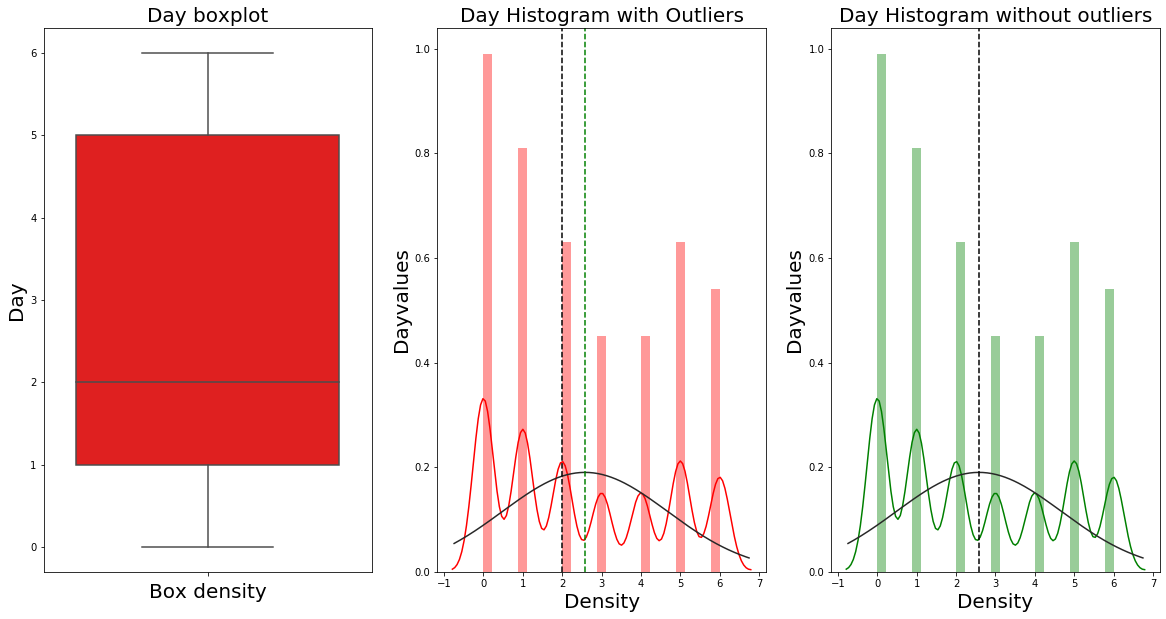

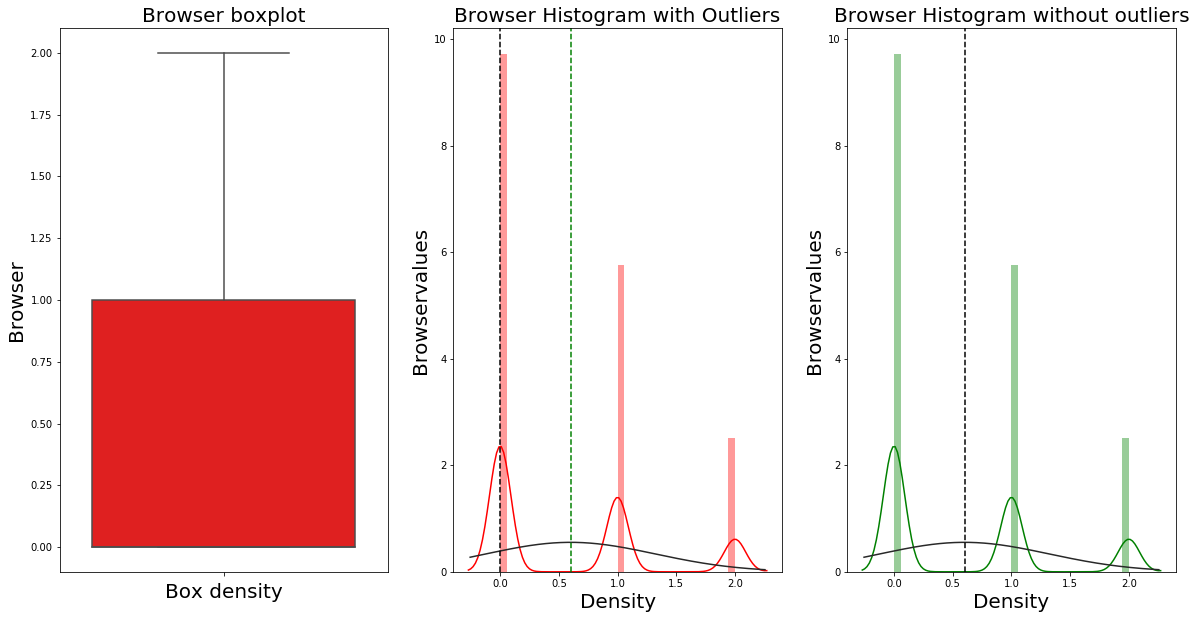

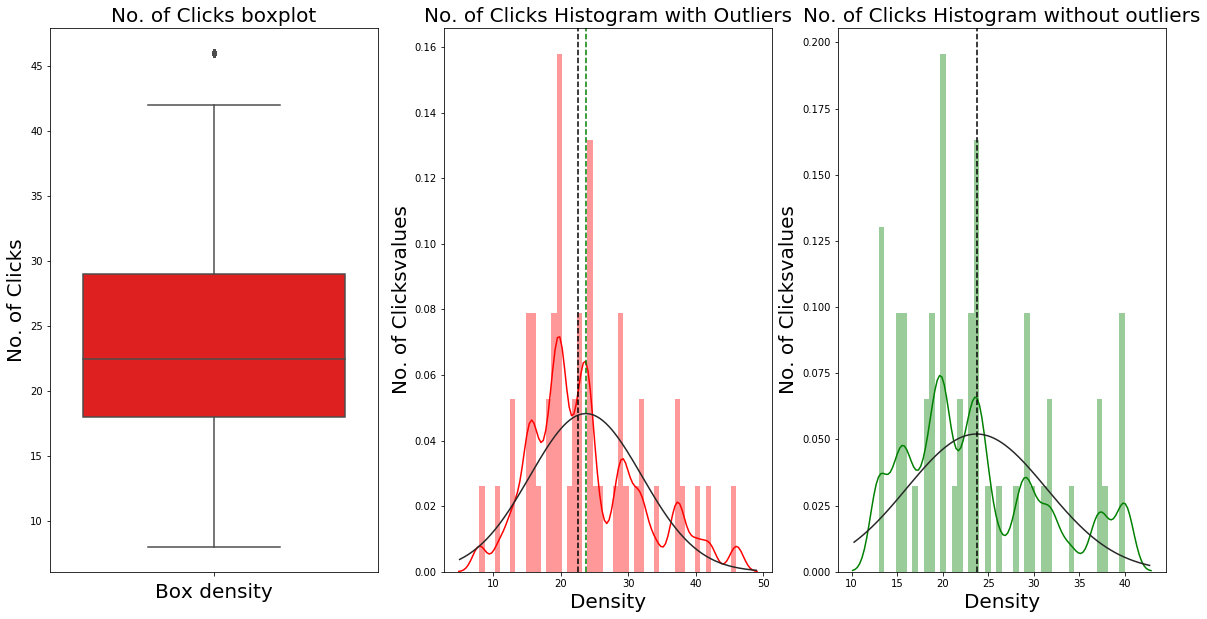

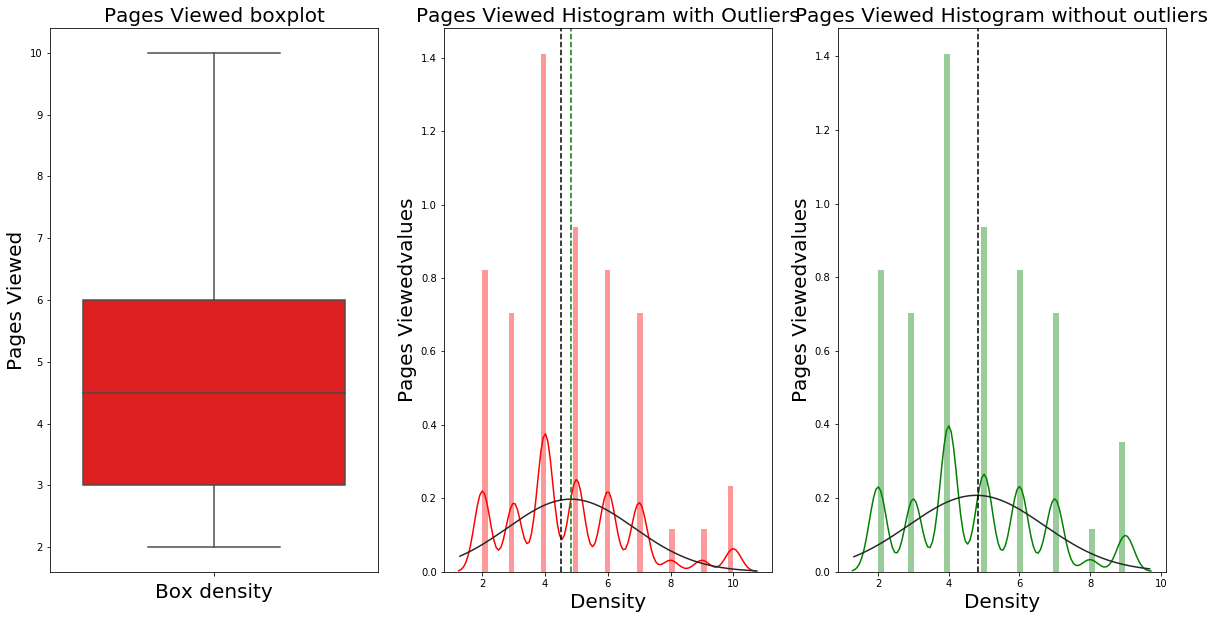

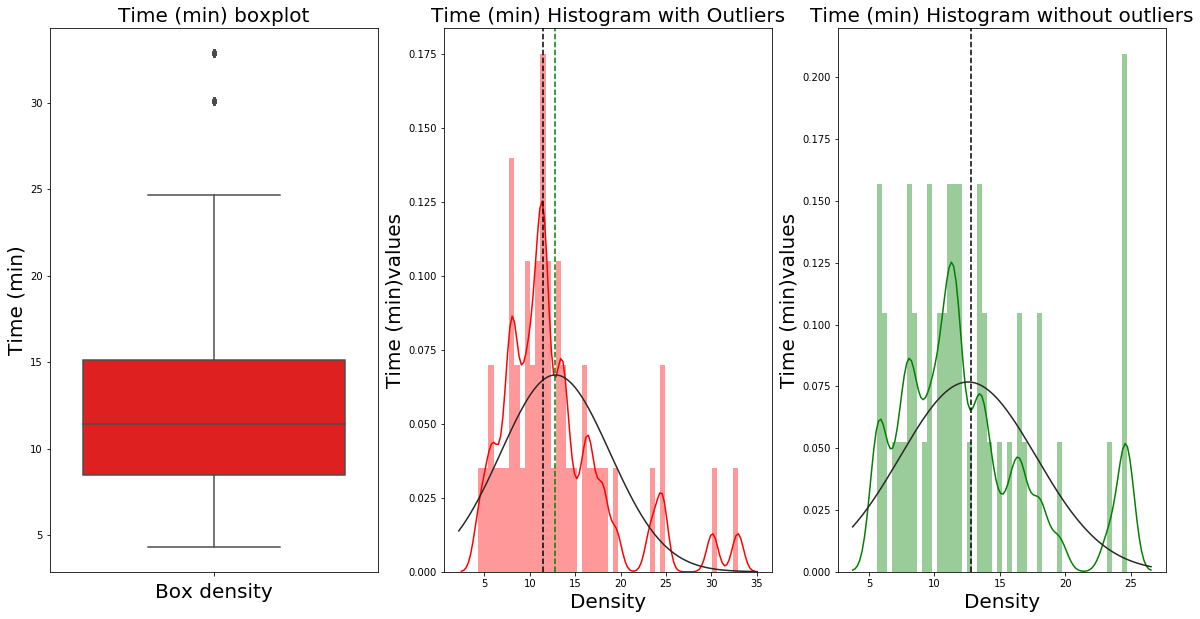

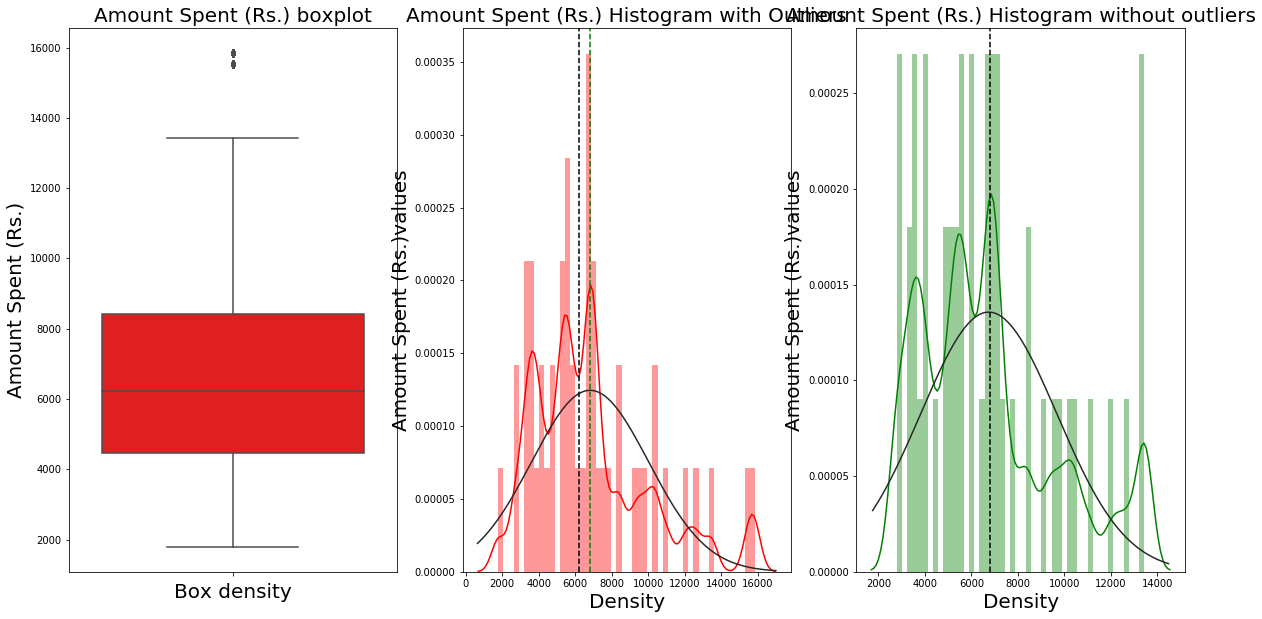

In [17]:
for col in list(redmi.columns):
    Outlierdetectionplots(redmi,col)

In [18]:
new_redmi = redmi.copy()
new_redmi.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,0,13,4,8.5,2668.0
1,2,0,15,5,16.9,3469.0
2,1,2,20,6,7.3,5215.0
3,1,0,42,6,30.1,10423.0
4,2,2,20,6,13.3,5404.0


## Identifying outliers with the help of standard deviation

In [19]:
def ReplaceOutliers(df,col,method='Std',strategy='median'):
    if method == 'Std':
        col_mean,col_std,col_Q2=new_redmi[col].mean(),new_redmi[col].std(),new_redmi[col].median()
        cut_off = col_std*2
        lowerlim,upperlim = col_mean-cut_off,col_mean+cut_off
        print(f'Outlier for{col} are:' ,np.sort([x for x in new_redmi[col]if x<lowerlim or x>upperlim]),'\n')
        
        # Replacing outliers with mean or median
        strategy='median'
        if strategy == 'median':
            new_redmi.loc[(new_redmi[col]<lowerlim) | (new_redmi[col]>upperlim),col] = col_Q2
        else:
            new_redmi.loc[(new_redmi[col]<lowerlim) | (new_redmi[col]>upperlim),col] = col_mean()
            
    elif method == 'Quantile':
        col_mean,col_Q2,col_Q1,col_Q3 = new_redmi[col].mean(),new_redmi[col].median(),new_redmi[col].quantile(0.25),new_redmi[col].quantile(0.75)
        IQR = col_Q3 - col_Q1
        lowerlim,upperlim = (col_Q1 - 1.5*IQR),(col_Q3 + 1.5*IQR)
        print(f'outlier for  {col} are:',np.sort([x for x in new_redmi[col] if x<lowerlim or x>upperlim ]), '\n')
        
        # Replacing outliers with meanor median
        Strategy = 'median'
        if strategy == 'median' :
            new_redmi.loc[(new_redmi[col]<lowerlim) | (new_redmi[col]>upperlim),col] = col_Q2
        else:
            new_redmi.loc[(new_redmi[col]<lowerlim) | (new_redmi[col]>upperlim),col] = col_mean()
            
    else:
        print('Error')
                                               

In [20]:
for col in list(new_redmi.columns):
    if(new_redmi[col].skew() >=1) | (new_redmi[col].skew()<=-1):
        ReplaceOutliers(new_redmi,col,method='Quantile',strategy='median')
    else:
        ReplaceOutliers(new_redmi,col,method = 'Std',strategy='median')

Outlier forDay are: [] 

Outlier forBrowser are: [] 

Outlier forNo. of Clicks are: [42 42 42 ... 46 46 46] 

Outlier forPages Viewed are: [ 9  9  9 ... 10 10 10] 

outlier for  Time (min) are: [30.1 30.1 30.1 ... 32.9 32.9 32.9] 

outlier for  Amount Spent (Rs.) are: [15530. 15530. 15530. ... 15851. 15851. 15851.] 



## Visualising data with outliers

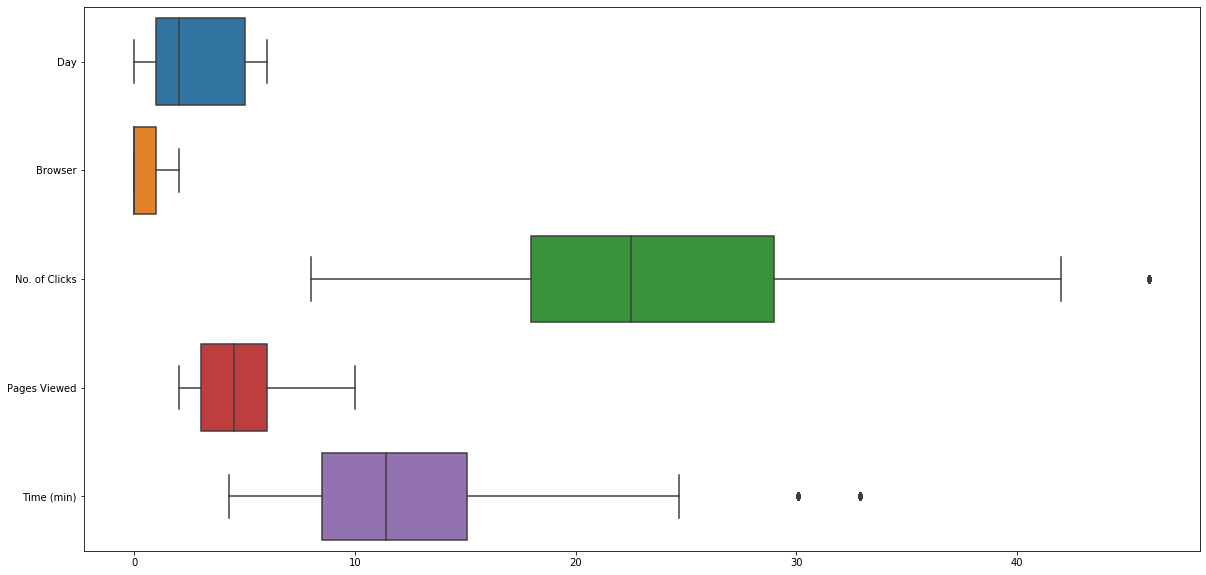

In [21]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(data=redmi.iloc[:,0:-1],orient='h')

## Visualising data without outliers

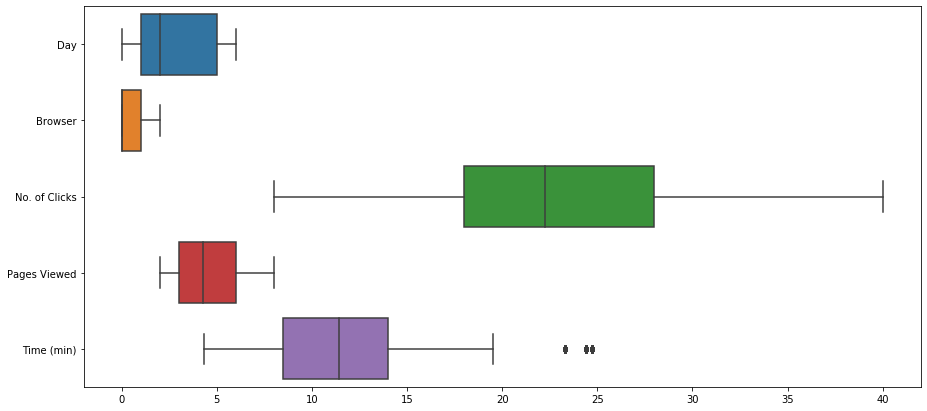

In [22]:
fig = plt.figure(figsize=(15,7))
ax = sns.boxplot(data=new_redmi.iloc[:,0:-1],orient='h')

In [23]:
custom_summary(new_redmi)

,Feature Name,count,Datatype,Mean,SD,Variance,Min,Q1,Median,Q3,Max,Range,IQR,Kurtosis,Skewness,Skewness Comment,Outlier Comment
0,Day,43200,float64,2.58,2.10,4.40,0.0,1.0,2.00,5.0,6.0,6.0,4.0,-1.32,0.28,Fairly Symmetric(Positive),No Outlier
1,Browser,43200,float64,0.60,0.72,0.52,0.0,0.0,0.00,1.0,2.0,2.0,1.0,-0.72,0.77,Moderately Positively Skewed,No Outlier
2,No. of Clicks,43200,float64,22.88,7.15,51.10,8.0,18.0,22.25,28.0,40.0,32.0,10.0,-0.18,0.47,Fairly Symmetric(Positive),No Outlier
3,Pages Viewed,43200,float64,4.51,1.60,2.55,2.0,3.0,4.25,6.0,8.0,6.0,3.0,-0.78,0.13,Fairly Symmetric(Positive),No Outlier
4,Time (min),43200,float64,12.01,4.63,21.41,4.3,8.5,11.40,14.0,24.7,20.4,5.5,0.75,0.91,Moderately Positively Skewed,Has Outlier
5,Amount Spent (Rs.),43200,float64,6433.80,2639.93,6969205.20,1784.0,4473.0,6114.50,7443.0,13440.0,11656.0,2970.0,0.12,0.73,Moderately Positively Skewed,Has Outlier


In [24]:
custom_summary(redmi)

,Feature Name,count,Datatype,Mean,SD,Variance,Min,Q1,Median,Q3,Max,Range,IQR,Kurtosis,Skewness,Skewness Comment,Outlier Comment
0,Day,43200,int32,2.58,2.10,4.40,0.0,1.0,2.0,5.0,6.0,6.0,4.0,-1.32,0.28,Fairly Symmetric(Positive),No Outlier
1,Browser,43200,int32,0.60,0.72,0.52,0.0,0.0,0.0,1.0,2.0,2.0,1.0,-0.72,0.77,Moderately Positively Skewed,No Outlier
2,No. of Clicks,43200,int64,23.74,8.27,68.35,8.0,18.0,22.5,29.0,46.0,38.0,11.0,0.03,0.68,Moderately Positively Skewed,Has Outlier
3,Pages Viewed,43200,int64,4.82,2.02,4.07,2.0,3.0,4.5,6.0,10.0,8.0,3.0,0.03,0.63,Moderately Positively Skewed,No Outlier
4,Time (min),43200,float64,12.81,6.00,36.03,4.3,8.5,11.4,15.1,32.9,28.6,6.6,2.05,1.41,Highly Positively Skewed,Has Outlier
5,Amount Spent (Rs.),43200,float64,6812.82,3201.91,10252200.31,1784.0,4473.0,6215.0,8412.0,15851.0,14067.0,3939.0,0.67,1.02,Highly Positively Skewed,Has Outlier


In [25]:
new_redmi.isnull().sum()

Day                   0
Browser               0
No. of Clicks         0
Pages Viewed          0
Time (min)            0
Amount Spent (Rs.)    0
dtype: int64

## Relationship study

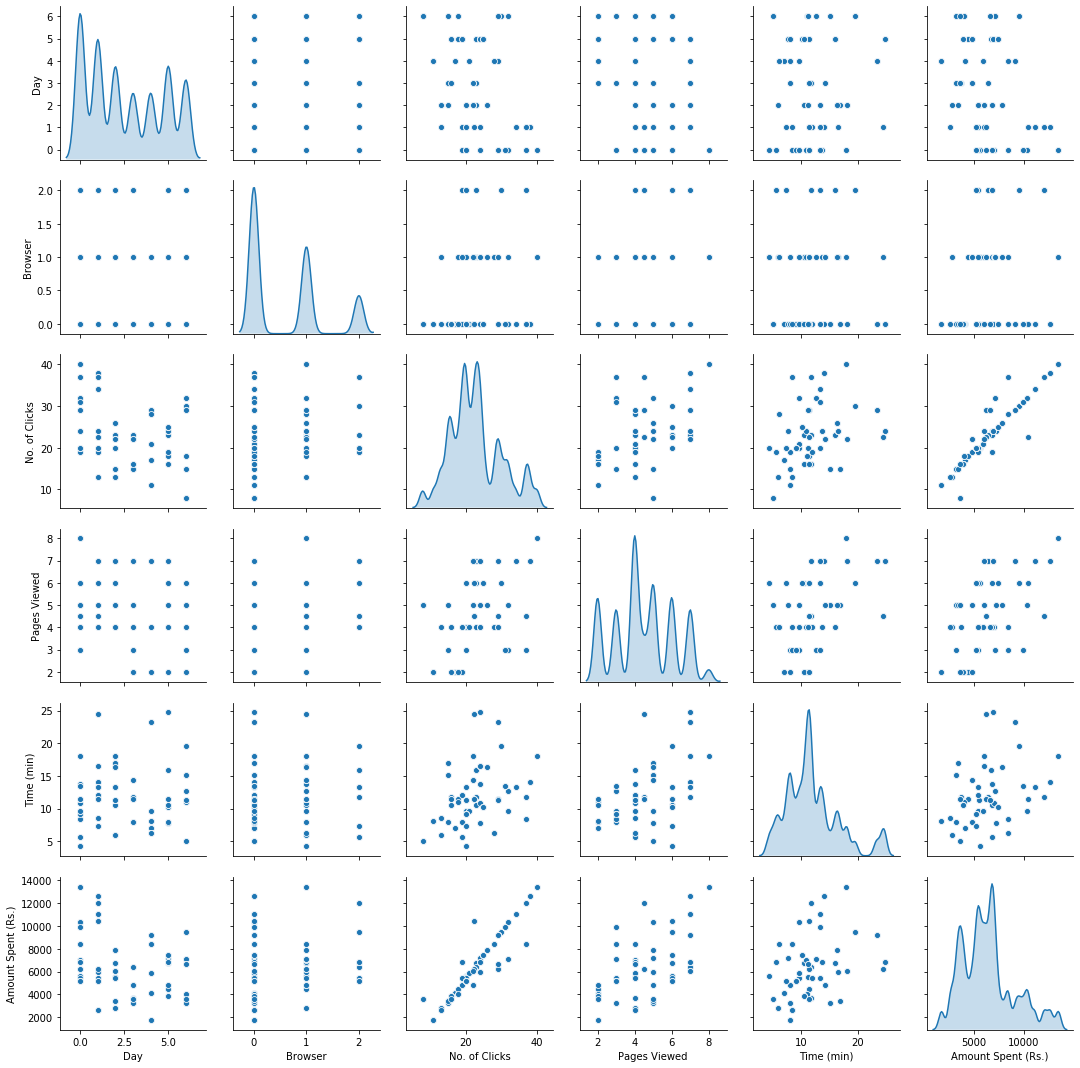

In [26]:
sns.pairplot(new_redmi,diag_kind='kde')

In [27]:
## Amount vs day: Negative correlation
## Amount vs no. of clicks: There is positive correlation
## Amount vs Pages viewed: There is positive correlation
## Amount vs Time spent: There is  positive correlation
new_redmi.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1.0,0.0,13.0,4.0,8.5,2668.0
1,2.0,0.0,15.0,5.0,16.9,3469.0
2,1.0,2.0,20.0,6.0,7.3,5215.0
3,1.0,0.0,22.5,6.0,11.4,10423.0
4,2.0,2.0,20.0,6.0,13.3,5404.0


## Multivariate Analysis

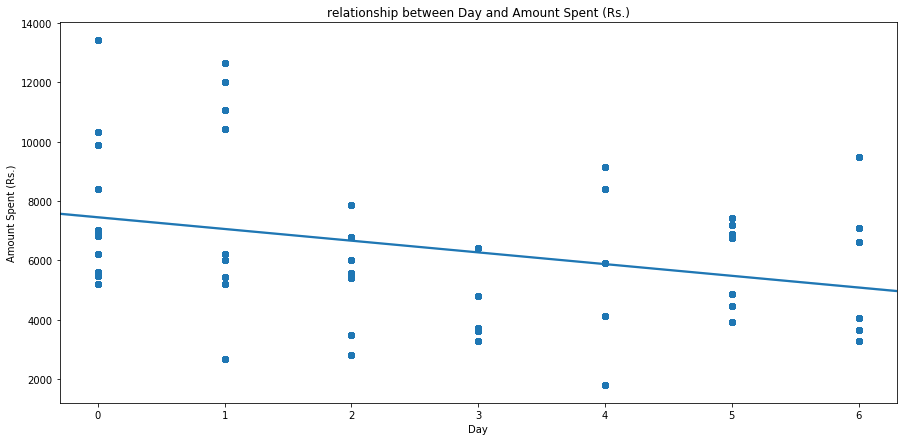

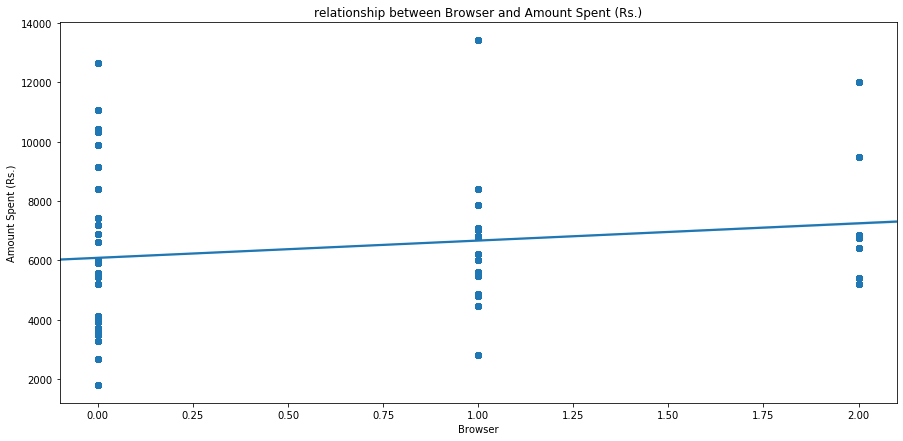

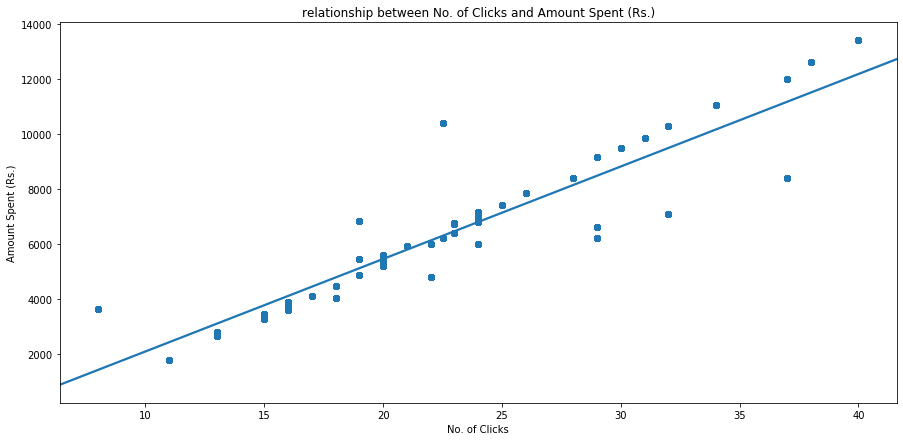

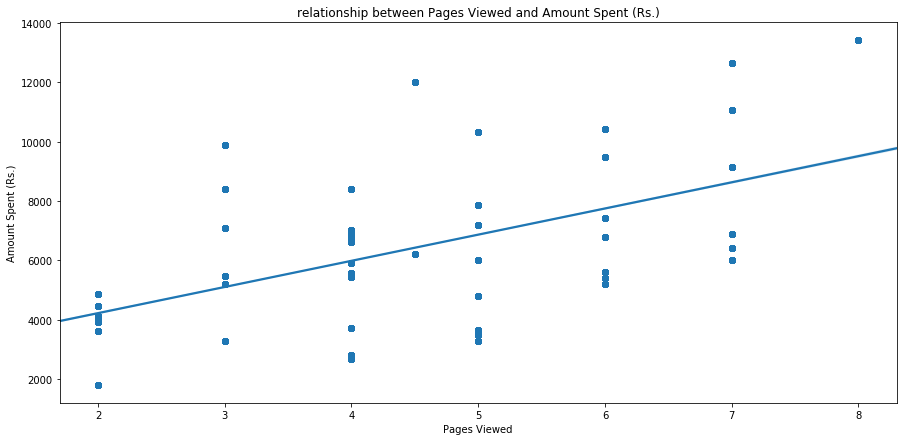

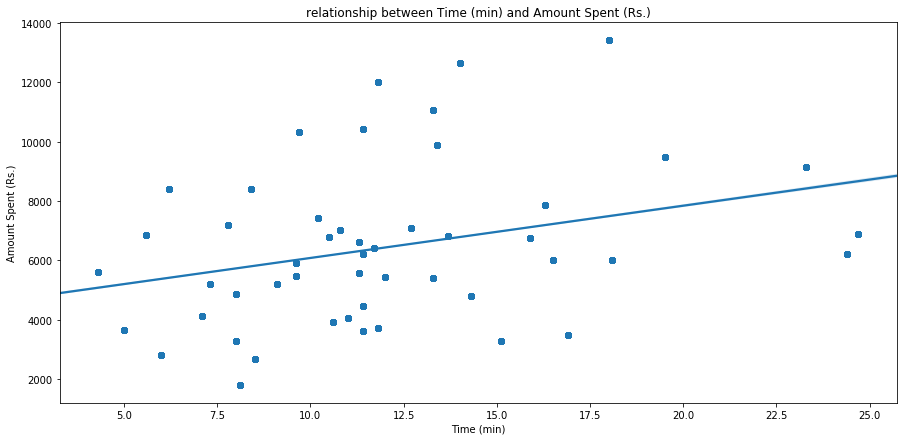

In [28]:
for col in list(new_redmi):
    if col!='Amount Spent (Rs.)':
        fig,ax1=plt.subplots(figsize=(15,7))
        sns.regplot(x=new_redmi[col],y=new_redmi['Amount Spent (Rs.)'],ax=ax1).set_title(f'relationship between {col} and Amount Spent (Rs.)')

In [29]:
## There is a homosedacity due to the constant variation wrt the regression line

## Performing correlation matrix

In [30]:
corr_matrix = new_redmi.corr()
corr_matrix

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
Day,1.000000,-0.137454,-0.275357,-0.183590,0.071320,-0.313845
Browser,-0.137454,1.000000,0.163350,0.168311,0.024695,0.158999
No. of Clicks,-0.275357,0.163350,1.000000,0.407524,0.330902,0.910829
Pages Viewed,-0.183590,0.168311,0.407524,1.000000,0.441172,0.534354
Time (min),0.071320,0.024695,0.330902,0.441172,1.000000,0.308923
Amount Spent (Rs.),-0.313845,0.158999,0.910829,0.534354,0.308923,1.000000


In [31]:
#fig,ax = plt.subplots(figsize=(13,8))
#sns.heatmap(corr_matrix,center=0,annot=True)

## Feature Interaction
## Multicolinearity detection
## Using VIX (Variation Inflation Index)

In [32]:
x = new_redmi.iloc[:,:-1]

def VIF_multicol(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    VIF = pd.DataFrame()
    VIF["VIF factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    VIF['features']=x.columns
    return VIF.sort_values(by='VIF factor',ascending=False).round(1)

In [33]:
VIF_multicol(x)

,VIF factor,features
3,11.5,Pages Viewed
2,10.6,No. of Clicks
4,10.3,Time (min)
0,2.2,Day
1,1.8,Browser


In [34]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [35]:
## Implement PCA for the above data
columns = []
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(x)
pdf = pd.DataFrame(principal_components)
pdf.head()

,0,1,2,3,4
0,-1.301740,-0.504456,-0.856380,-1.067085,0.156489
1,-0.084114,0.914174,-0.555946,-1.197909,0.780865
2,0.561063,-1.790390,1.276366,-0.935254,-0.614564
3,0.443912,-0.055343,-1.072830,-0.780981,-0.432581
4,1.024412,-0.739365,1.596970,-0.895571,0.081706


In [36]:
pca.explained_variance_ratio_

array([0.38312383, 0.22823001, 0.17668093, 0.11580767, 0.09615757])

In [37]:
np.cumsum(pca.explained_variance_ratio_)

array([0.38312383, 0.61135383, 0.78803476, 0.90384243, 1.        ])

In [38]:
pdf = pdf.iloc[:,0:5]

In [39]:
pdf.head()

,0,1,2,3,4
0,-1.301740,-0.504456,-0.856380,-1.067085,0.156489
1,-0.084114,0.914174,-0.555946,-1.197909,0.780865
2,0.561063,-1.790390,1.276366,-0.935254,-0.614564
3,0.443912,-0.055343,-1.072830,-0.780981,-0.432581
4,1.024412,-0.739365,1.596970,-0.895571,0.081706


In [40]:
#sns.pairplot(data=pdf)

In [41]:
VIF_multicol(pdf)

,VIF factor,features
0,1.0,0
2,1.0,2
4,1.0,4
1,1.0,1
3,1.0,3


In [42]:
pdf = pdf.join(new_redmi[['Amount Spent (Rs.)']],how='left')
pdf.head()

,0,1,2,3,4,Amount Spent (Rs.)
0,-1.301740,-0.504456,-0.856380,-1.067085,0.156489,2668.0
1,-0.084114,0.914174,-0.555946,-1.197909,0.780865,3469.0
2,0.561063,-1.790390,1.276366,-0.935254,-0.614564,5215.0
3,0.443912,-0.055343,-1.072830,-0.780981,-0.432581,10423.0
4,1.024412,-0.739365,1.596970,-0.895571,0.081706,5404.0


## Model Building

In [43]:
## This user defined function is built for train test split
def TrainTestsplit(df,target,test_size=0.3):
    x=df.drop(target,axis=1)
    y=df[target]
    return train_test_split(x,y,test_size=test_size,random_state=100)

In [44]:
Var = TrainTestsplit(new_redmi,'Amount Spent (Rs.)')

In [45]:
## New User defined function for building a model
def Regressionmodel(model_name,model,df,target,test_size=0.3):
    x_train,x_test,y_train,y_test = TrainTestsplit(df,target,test_size=0.3)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    lr = [model_name,r2_score(y_test,y_pred),rmse]
    return lr

In [46]:
## Model prediction before PCA
linear = LinearRegression()
Regressionmodel('linear_model',linear,new_redmi,'Amount Spent (Rs.)')

['linear_model', 0.8635507560086886, 972.6751417248352]

In [47]:
## MODEL prediction after PCA
linear = LinearRegression()
Regressionmodel('linear_model',linear,pdf,'Amount Spent (Rs.)')

['linear_model', 0.8635507560086886, 972.675141724835]

In [48]:
## BUilding multiple models
def model_building(df,target,test_size=0.3):
    col_names = ['model_name','R-square','RMSE']
    result =pd.DataFrame(columns=col_names)
    result.loc[len(result)]=Regressionmodel('Linear Regression',LinearRegression(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Lasso Regression',Lasso(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Ridge Regression',Ridge(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Decision Tree Regressor',DecisionTreeRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Random Forest Regressor',RandomForestRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Adaboost',AdaBoostRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('G Boost',GradientBoostingRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('XG Boost',XGBRegressor(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('Support Vector Regressor',SVR(),df,target,test_size)
    result.loc[len(result)]=Regressionmodel('KNN',KNeighborsRegressor(),df,target,test_size)
    return result

In [49]:
result_redminew = model_building(new_redmi,'Amount Spent (Rs.)')
result_pdf = model_building(pdf,'Amount Spent (Rs.)')
print('************Result before PCA****************')
print(result_redminew)
print('\n\n*********Result after PCA***************')
print(result_pdf)

[01:02:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
************Result before PCA****************
                 model_name  R-square          RMSE
0         Linear Regression  0.863551  9.726751e+02
1          Lasso Regression  0.863543  9.727011e+02
2          Ridge Regression  0.863551  9.726753e+02
3   Decision Tree Regressor  1.000000  1.464970e-13
4   Random Forest Regressor  1.000000  1.464970e-13
5                  Adaboost  0.919942  7.450502e+02
6                   G Boost  0.998071  1.156620e+02
7                  XG Boost  0.998119  1.142079e+02
8  Support Vector Regressor  0.342839  2.134609e+03
9                       KNN  1.000000  1.464970e-13


*********Result after PCA***************
           

## Identification of clusters

In [50]:
# Splitting X and Y
x = new_redmi.iloc[:,:-1]
y = new_redmi.iloc[:,:-1]

In [51]:
labels = KMeans(n_clusters=2,random_state=100).fit_predict(x)
#sns.scatterplot(new_redmi['No. of Clicks'],new_redmi['Amount Spent (Rs.)'],hue=labels)

In [52]:
new_redmi.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1.0,0.0,13.0,4.0,8.5,2668.0
1,2.0,0.0,15.0,5.0,16.9,3469.0
2,1.0,2.0,20.0,6.0,7.3,5215.0
3,1.0,0.0,22.5,6.0,11.4,10423.0
4,2.0,2.0,20.0,6.0,13.3,5404.0


In [53]:
## Finding clusters with every variables from all toher variables
def kmeansplot(x,t_col,labels):
    
    columns = list(set(list(x.columns))-set(new_redmi['Amount Spent (Rs.)']))
    r = int(len(columns)/2)
    if r%2 == 0:
        r = r
    else:
        r = r+1
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    for col in range(0,r): # This loop is for all the rows
        for j in range(0,2): # This loop is for all the columns
            if a != len(columns):
                ax[col][j].scatter(x[t_col],x[columns[a]],c=labels)
                ax[col][j].set_xlabel(t_col)
                ax[col][j].set_ylabel(columns[a])
                a = a+1

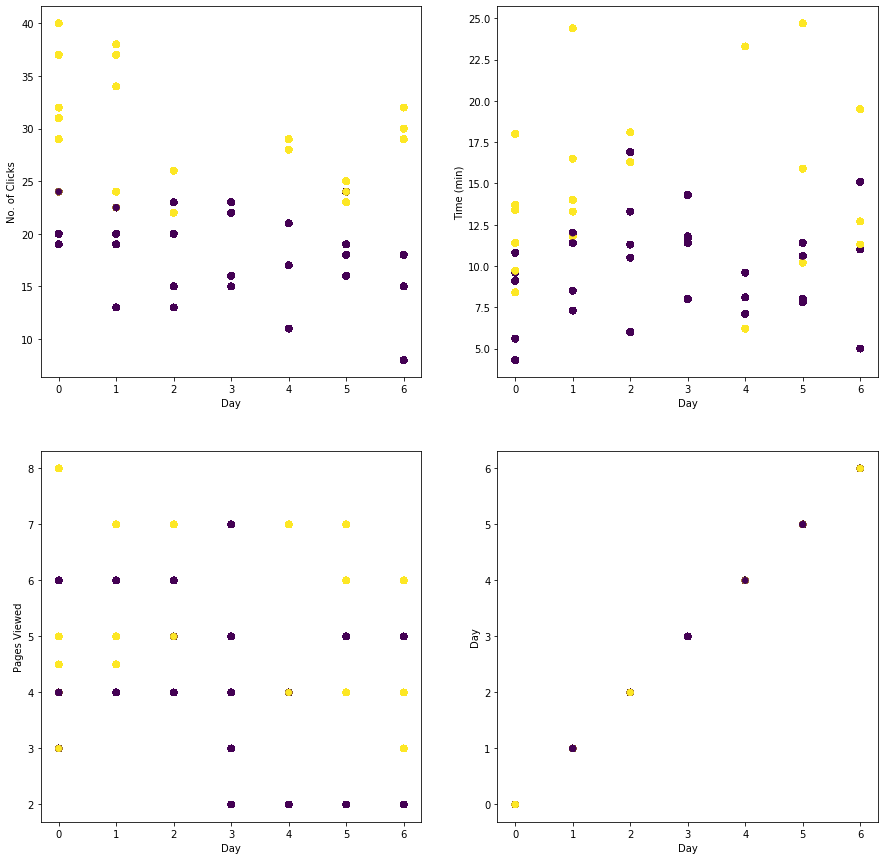

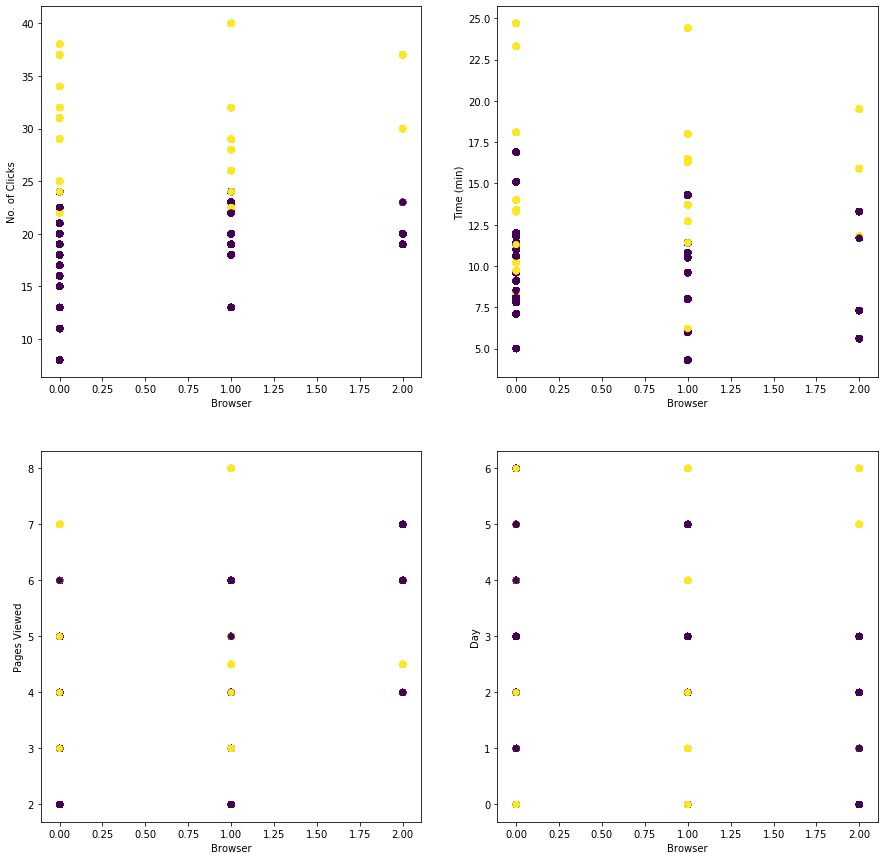

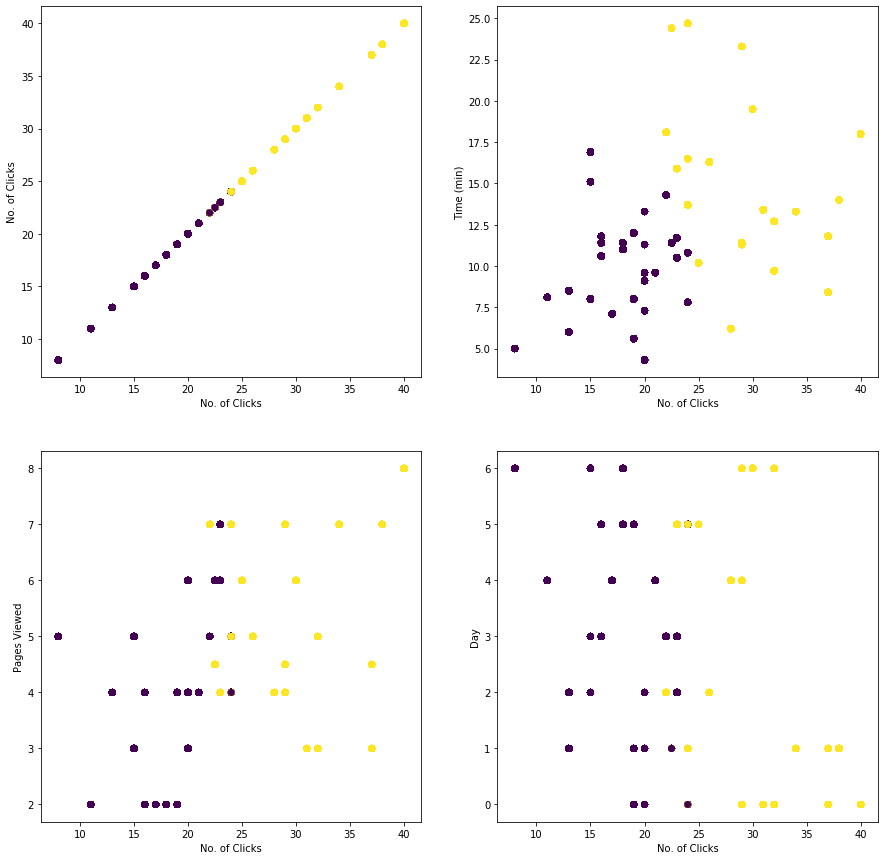

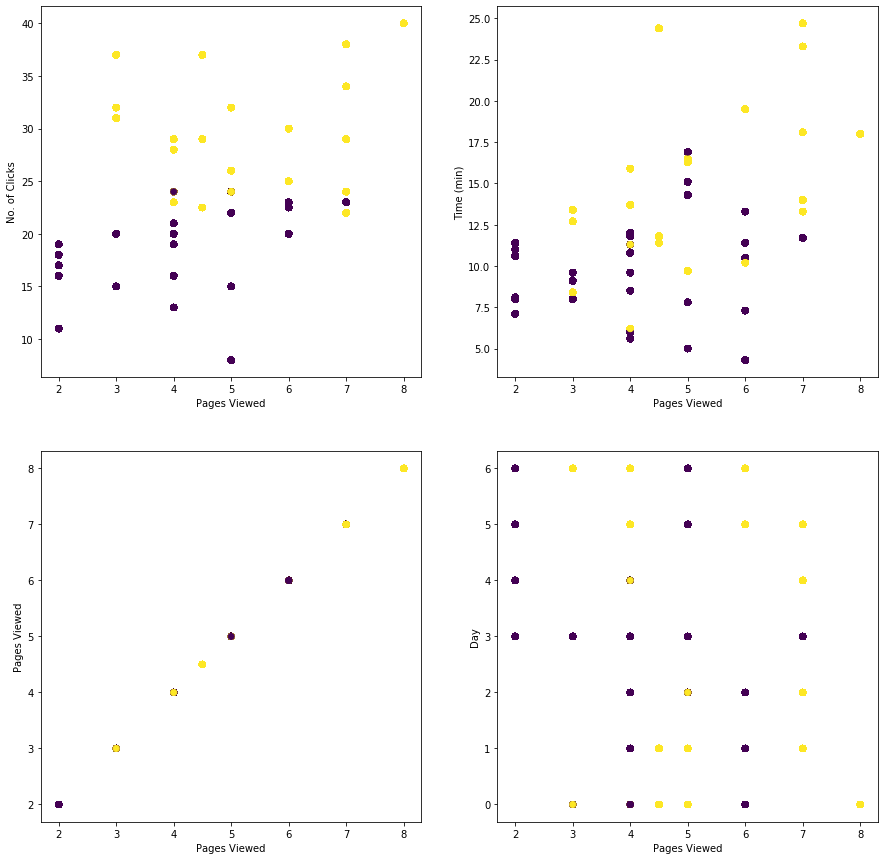

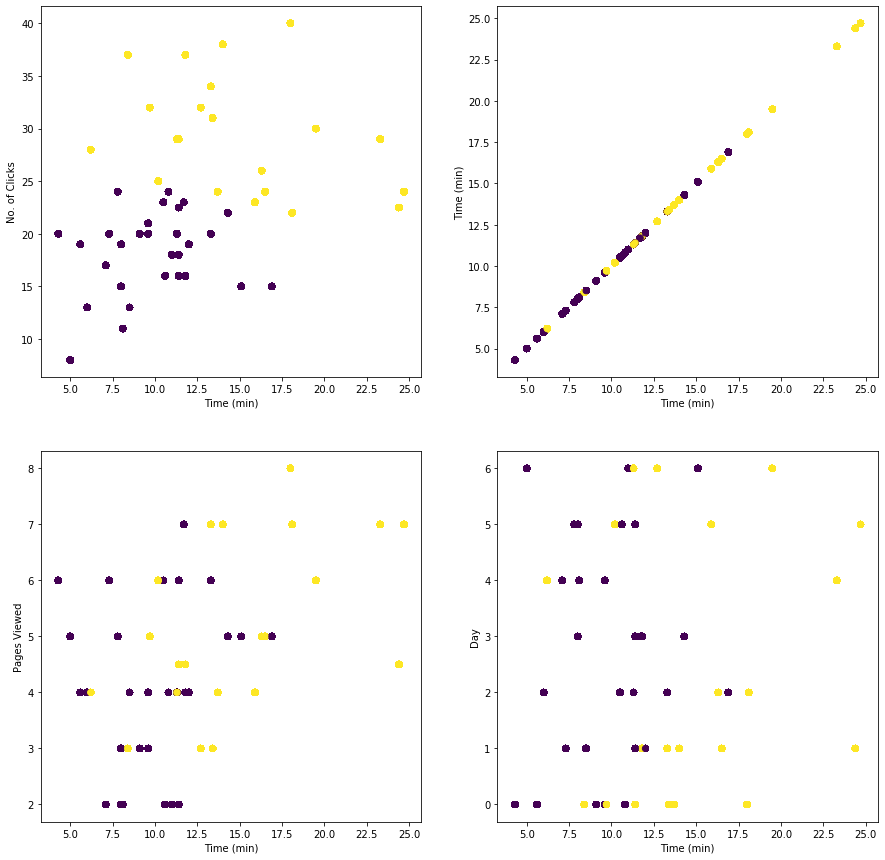

In [54]:
x = new_redmi.iloc[:,:-1]
y = new_redmi.iloc[:,:-1]

for col in x.columns:
    kmeansplot(x,col,labels)

In [55]:
## Adding features based on clusters
new_df = new_redmi.join(pd.DataFrame(labels,columns=['labels']),how='left')
new_df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),labels
0,1.0,0.0,13.0,4.0,8.5,2668.0,0
1,2.0,0.0,15.0,5.0,16.9,3469.0,0
2,1.0,2.0,20.0,6.0,7.3,5215.0,0
3,1.0,0.0,22.5,6.0,11.4,10423.0,0
4,2.0,2.0,20.0,6.0,13.3,5404.0,0


In [56]:
## Grouping the variables based on clusters and finding the mean and median for the same
newfeat = new_df.groupby('labels')['No. of Clicks'].agg(['mean','median'])
newfeat

,mean,median
labels,,
0,18.189655,19.0
1,29.357143,29.0


In [57]:
## Merging the mean and median with respect to the labels
new_df = new_df.merge(newfeat,on='labels',how='left')
new_df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),labels,mean,median
0,1.0,0.0,13.0,4.0,8.5,2668.0,0,18.189655,19.0
1,2.0,0.0,15.0,5.0,16.9,3469.0,0,18.189655,19.0
2,1.0,2.0,20.0,6.0,7.3,5215.0,0,18.189655,19.0
3,1.0,0.0,22.5,6.0,11.4,10423.0,0,18.189655,19.0
4,2.0,2.0,20.0,6.0,13.3,5404.0,0,18.189655,19.0


In [58]:
## Renaming mean and median with clicks_mean and clicks_median
new_df.rename(columns={'mean':'clicks_mean','median':'clicks_median'},inplace=True)
new_df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),labels,clicks_mean,clicks_median
0,1.0,0.0,13.0,4.0,8.5,2668.0,0,18.189655,19.0
1,2.0,0.0,15.0,5.0,16.9,3469.0,0,18.189655,19.0
2,1.0,2.0,20.0,6.0,7.3,5215.0,0,18.189655,19.0
3,1.0,0.0,22.5,6.0,11.4,10423.0,0,18.189655,19.0
4,2.0,2.0,20.0,6.0,13.3,5404.0,0,18.189655,19.0


In [59]:
## Deleting the labels
new_df.drop('labels',axis=1,inplace=True)

In [60]:
new_df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),clicks_mean,clicks_median
0,1.0,0.0,13.0,4.0,8.5,2668.0,18.189655,19.0
1,2.0,0.0,15.0,5.0,16.9,3469.0,18.189655,19.0
2,1.0,2.0,20.0,6.0,7.3,5215.0,18.189655,19.0
3,1.0,0.0,22.5,6.0,11.4,10423.0,18.189655,19.0
4,2.0,2.0,20.0,6.0,13.3,5404.0,18.189655,19.0


In [61]:
## Building models before and after clustering
result_new_redmi = model_building(new_redmi,'Amount Spent (Rs.)')
result_new_df = model_building(new_df,'Amount Spent (Rs.)')
print('****************Result before clustering******************')
print(result_new_redmi)
print('\n\n****************Result after clustering*******************')
print(result_new_df)

[01:06:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:08:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
****************Result before clustering******************
                 model_name  R-square          RMSE
0         Linear Regression  0.863551  9.726751e+02
1          Lasso Regression  0.863543  9.727011e+02
2          Ridge Regression  0.863551  9.726753e+02
3   Decision Tree Regressor  1.000000  1.464970e-13
4   Random Forest Regressor  1.000000  1.464970e-13
5                  Adaboost  0.922715  7.320305e+02
6                   G Boost  0.998071  1.156620e+02
7                  XG Boost  0.998119  1.142079e+02
8  Support Vector Regressor  0.342839  2.134609e+03
9                       KNN  1.000000  1.464970e-13


****************Result after clustering

## Feature Importance

In [62]:
x_train,x_test,y_train,y_test = TrainTestsplit(new_df,'Amount Spent (Rs.)',test_size=0.3)
xgb = XGBRegressor()
gb = GradientBoostingRegressor()

In [63]:
xgb.fit(x_train,y_train)

[01:09:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

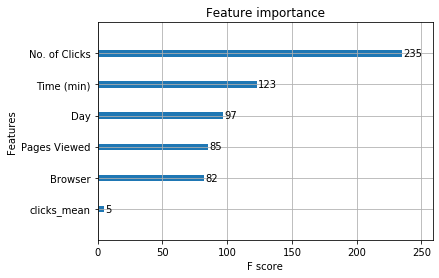

In [64]:
xgboost.plot_importance(xgb) 

## Feature Selection using xgboost

In [65]:
from numpy import loadtxt,sort
from sklearn.feature_selection import SelectFromModel

In [66]:
xgb_pred = xgb.predict(x_test)
xgb_pred = np.round(xgb_pred,2)
xgb_r2score = r2_score(y_test,xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))

In [67]:
print("r-score",xgb_r2score)
print("rmse", xgb_rmse)

r-score 0.9980034113675725
rmse 117.659377708154


In [68]:
l1 = []
threshold = sort(xgb.feature_importances_) #Sorting all the feature importance
for thresh in threshold:
    selection = SelectFromModel(xgb,threshold=thresh,prefit=True)
    select_x_train = selection.transform(x_train)  ## Automatically it will give us the important features from the train data
    selection_model = XGBRegressor()  ## Model Name
    selection_model.fit(select_x_train,y_train)
    select_x_test = selection.transform(x_test)
    new_pred = selection_model.predict(select_x_test)
    result = [thresh,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,new_pred)),r2_score(y_test,new_pred)]
    l1.append(result)
result_df=pd.DataFrame(l1,columns=['threshold','no. of features','RMSE','R2-score'])
result_df

[01:09:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:04] WARNI

,threshold,no. of features,RMSE,R2-score
0,0.000000,7,117.658687,0.998003
1,0.009255,6,117.658687,0.998003
2,0.027799,5,114.207853,0.998119
3,0.032014,4,120.180770,0.997917
4,0.070595,3,144.825142,0.996975
5,0.117818,2,289.281251,0.987931
6,0.742519,1,769.158073,0.914677


In [69]:
new_df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),clicks_mean,clicks_median
0,1.0,0.0,13.0,4.0,8.5,2668.0,18.189655,19.0
1,2.0,0.0,15.0,5.0,16.9,3469.0,18.189655,19.0
2,1.0,2.0,20.0,6.0,7.3,5215.0,18.189655,19.0
3,1.0,0.0,22.5,6.0,11.4,10423.0,18.189655,19.0
4,2.0,2.0,20.0,6.0,13.3,5404.0,18.189655,19.0


## Creating dataframe by cosnidering only 5 features

In [70]:
x = new_df.drop(['Amount Spent (Rs.)','clicks_mean','clicks_median'],axis=1)
x.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min)
0,1.0,0.0,13.0,4.0,8.5
1,2.0,0.0,15.0,5.0,16.9
2,1.0,2.0,20.0,6.0,7.3
3,1.0,0.0,22.5,6.0,11.4
4,2.0,2.0,20.0,6.0,13.3


In [71]:
y = new_df['Amount Spent (Rs.)']
y = pd.DataFrame(y)
y.head()

,Amount Spent (Rs.)
0,2668.0
1,3469.0
2,5215.0
3,10423.0
4,5404.0


## Performing K-fold cross validation

In [72]:
def kfold_cv(x,y,folds=10):
    
    lr = LinearRegression()
    ls = Lasso()
    rr = Ridge()
    dt = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    abb = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    xgb = XGBRegressor()
    #svr = SVR()
    knn = KNeighborsRegressor()
    
    score_lr=cross_val_score(lr,x,y,cv=folds)
    score_ls=cross_val_score(ls,x,y,cv=folds)
    score_rr=cross_val_score(rr,x,y,cv=folds)
    score_dt=cross_val_score(dt,x,y,cv=folds)
    score_rf=cross_val_score(rf,x,y,cv=folds)
    score_abb=cross_val_score(abb,x,y,cv=folds)
    score_gb=cross_val_score(gb,x,y,cv=folds)
    score_xgb=cross_val_score(xgb,x,y,cv=folds)
   #score_svr=cross_val_score(svr,x,y,cv=folds) 
    score_knn=cross_val_score(knn,x,y,cv=folds)
    
    models = [lr,ls,rr,dt,rf,abb,gb,xgb,123,knn]
    model_names = ['Linear Regression','Lasso Regression','Ridge Regression','Decision tree','Random Forest','Adaboost','G-boost','XGboost',
                  '123','KNN']
    scores = [score_lr,score_ls,score_rr,score_dt,score_rf,score_abb,score_gb,score_xgb,123,score_knn]
    
    result = []
    for x in range(0,len(models)):
        print(model_names[x])
        sc_mean = np.mean(scores[x])
        sc_std = np.std(scores[x])
        m_name = model_names[x]
        var = [m_name,sc_mean,sc_std]
        result.append(var)
        
    result_df = pd.DataFrame(result,columns=['model name','average accuracy','std dev'])
    return result_df

In [73]:
kfold_cv(x,y)

[01:10:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:10:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:11:12] WARNI

,model name,average accuracy,std dev
0,Linear Regression,0.866801,0.004909
1,Lasso Regression,0.866801,0.004912
2,Ridge Regression,0.866801,0.004909
3,Decision tree,1.000000,0.000000
4,Random Forest,1.000000,0.000000
5,Adaboost,0.923321,0.006963
6,G-boost,0.998145,0.000215
7,XGboost,0.998209,0.000244
8,123,123.000000,0.000000
9,KNN,1.000000,0.000000


## Grid Search Cross Validation

In [74]:
## Performing Grid Search cross validation on linear regression
lr_parameters = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}

linear = LinearRegression()
linear_grid = GridSearchCV(linear,param_grid=lr_parameters,cv=5,verbose=True,scoring='r2')
linear_grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=True)

In [75]:
print('best parameter for linear regression:',linear_grid.best_params_)

best parameter for linear regression: {'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [76]:
new_linear = LinearRegression({'copy_X': True, 'fit_intercept': True, 'normalize': False})
new_linear.fit(x_train,y_train)
new_linear_pred = new_linear.predict(x_test)
print('r-score:',r2_score(y_test,new_linear_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,new_linear_pred)))

r-score: 0.8647970411538203
rmse: 968.2228952589116


In [77]:
## model after hyper parameter tuning gives better accuracy than before.
## Since the desired accuracy is already in place, we are not going to do any more model hypertuning o f parameters

## Implementation of Learning Curve

In [81]:
def generatelearningcurve(model_name,model_estimator):
    train_size,train_score,test_score = learning_curve(estimator=model_estimator,X=x,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color='blue')
    plt.plot(train_size,test_score_mean,color='red')
    plt.xlabel('sample')
    plt.ylabel('accuracy score')
    plt.title('Learning curve for ' + model_name)
    plt.legend(('training score','testing score'),loc='best')

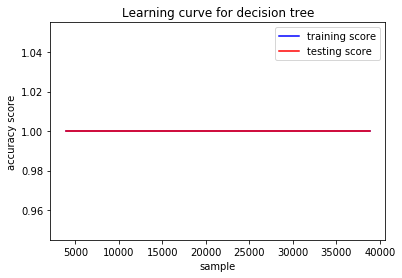

In [85]:
generatelearningcurve('decision tree',DecisionTreeRegressor())

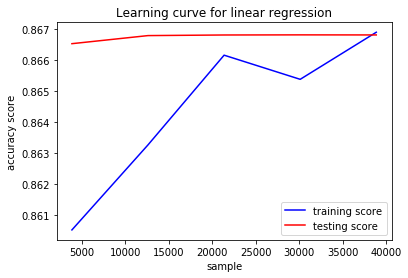

In [86]:
generatelearningcurve('linear regression',LinearRegression())

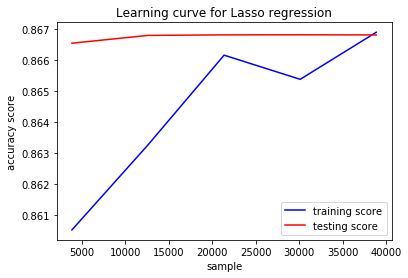

In [87]:
generatelearningcurve('Lasso regression',Lasso())

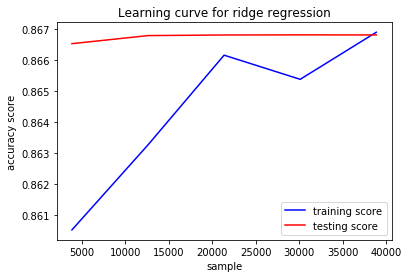

In [88]:
generatelearningcurve('ridge regression',Ridge())

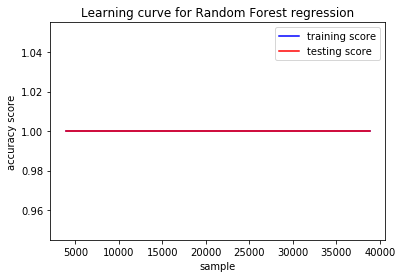

In [89]:
generatelearningcurve('Random Forest regression',RandomForestRegressor())

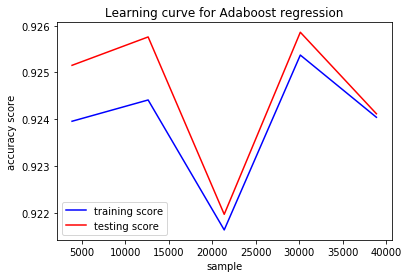

In [90]:
generatelearningcurve('Adaboost regression',AdaBoostRegressor())

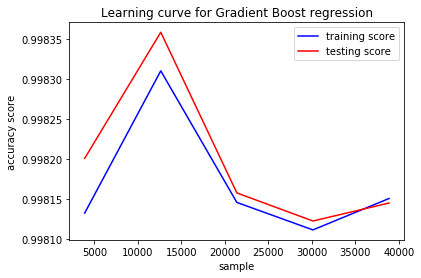

In [91]:
generatelearningcurve('Gradient Boost regression',GradientBoostingRegressor())

[01:26:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:55] WARNI

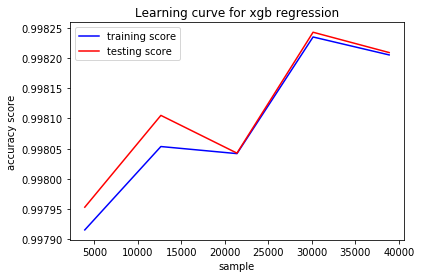

In [92]:
generatelearningcurve('xgb regression',XGBRegressor())

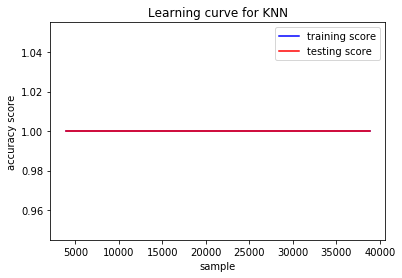

In [93]:
generatelearningcurve('KNN',KNeighborsRegressor())

In [ ]:
## lr = LinearRegression()
##    ls = Lasso()
##    rr = Ridge()
##    dt = DecisionTreeRegressor()
##    rf = RandomForestRegressor()
##    abb = AdaBoostRegressor()
##    gb = GradientBoostingRegressor()
##    xgb = XGBRegressor()
##    #svr = SVR()
##    knn = KNeighborsRegressor()